***
# **PINN for Systems of ODEs**
***

We are solving the Cauchy initial value problem for a system of ordinary differential equations:

$
\begin{cases}
    x'=f(x,y,t),\\
    y'=g(x,y,t).
\end{cases}
$

$
\begin{cases}
x(t_0)=x_0,\\
y(t_0)=y_0.
\end{cases}
$

$t\in[t_0,b].$

***
## **Includes**
***

Installation of the necessary toolkits:
* NumPy -- https://numpy.org/install/
* Matplotlib -- https://matplotlib.org/stable/users/installing/index.html
* TensorFlow --https://github.com/microsoft/onnxruntime-training-examples

Let's import the necessary libraries:
* numpy -- for math,
* matplotlib -- for chart plotting,
* tensorflow -- for ML,
* time -- for performance evaluation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time


For GPU support in TensorFlow:
* *conda create -n py310 python=3.10 tensorflow-gpu==2.10*
* https://www.tensorflow.org/guide/gpu?hl=ru

In [2]:
# Let's list out all the avaliable GPUs:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Let's configure TensorFlow to use CPU or GPU
#tf.config.list_physical_devices('CPU')
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

***
## **Some Examples**
***

Now, let's introduce a couple of examples:

#### 1. Closed loop:

$
\begin{cases}
    x'=y,\\
    y'=x-x^2.
\end{cases}
$

$t\in[0.0,8.0]$

$
\begin{cases}
    x(0.0)=1.0,\\
    y(0.0)=0.5.
\end{cases}
$

In [3]:
def f1(x, y, t):
    return y

def g1(x, y, t):
    return x-x*x

#### 2. Spiral:

$
\begin{cases}
    x'=y,\\
    y'=x^2-2x-y.
\end{cases}
$

$t\in[0.0,2\pi]$

$
\begin{cases}
    x(0.0)=0.2,\\
    y(0.0)=0.2.
\end{cases}
$

In [4]:
def f2(x, y, t):
    return y

def g2(x, y, t):
    return x*x-2*x-y

***
## **1. Numerical Methods**
***

## **Euler's method**

$
\begin{aligned}
x_1(t + \Delta t) &= x_1(t) + \Delta t \cdot f_1(x_1(t), x_2(t), t) \\
x_2(t + \Delta t) &= x_2(t) + \Delta t \cdot f_2(x_1(t), x_2(t), t)
\end{aligned}
$


*Implement Euler's method for our systems:*

In [6]:
def euler_method(t, x, y, f1, f2, h):
    for i in range(1, len(t)):
        x[i] = x[i-1] + h * f1(x[i-1], y[i-1], t[i-1])
        y[i] = y[i-1] + h * f2(x[i-1], y[i-1], t[i-1])



# parameters intializeation
h = 0.0001  # Step size
t = np.arange(0, 8, h)
x = np.zeros(len(t))
y = np.zeros(len(t))
x[0] = 1
y[0] = 0.5


euler_method(t, x, y, f1, g1, h)




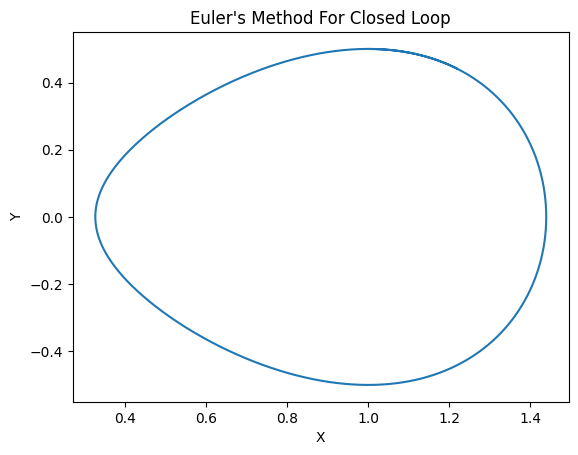

In [7]:
def plotxy(x, y, title):
    plt.plot(x, y)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.show()

plotxy(x, y, "Euler's Method For Closed Loop")

In [8]:
# parameters intializeation
h = 0.01  # Step size
t = np.arange(0, 2 * np.pi, h)
euler_x = np.zeros(len(t))
euler_y = np.zeros(len(t))
euler_x[0] = 0.2
euler_y[0] = 0.2


euler_method(t, euler_x, euler_y, f2, g2, h)



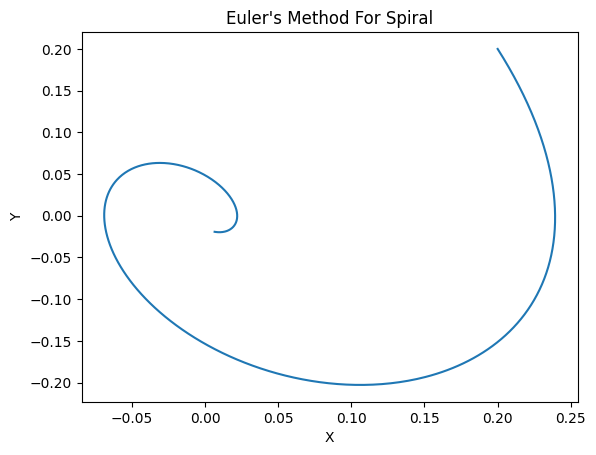

In [9]:
def plotxy(x, y, title):
    plt.plot(x, y)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.show()

plotxy(euler_x, euler_y, "Euler's Method For Spiral")

## **Improved Euler's method**

The improved Euler's method for the system mentioned above looks like following:

$
\begin{aligned}
x_1(t + \Delta t) &= x_1(t) + \frac{\Delta t}{2} \cdot (f_1(x_1(t), x_2(t), t) + f_1(x_1(t) + \Delta t \cdot f_1(x_1(t), x_2(t), t), x_2(t) + \Delta t \cdot f_2(x_1(t), x_2(t), t), t + \Delta t)) \\
x_2(t + \Delta t) &= x_2(t) + \frac{\Delta t}{2} \cdot (f_2(x_1(t), x_2(t), t) + f_2(x_1(t) + \Delta t \cdot f_1(x_1(t), x_2(t), t), x_2(t) + \Delta t \cdot f_2(x_1(t), x_2(t), t), t + \Delta t))
\end{aligned}
$


*Implement improved Euler's method for our system:*

In [10]:
def improved_euler_method(t, x, y, f1, f2, h):
    for i in range(1, len(t)):
        x_not = x[i-1] + h * f1(x[i-1], y[i-1], t[i-1])
        y_not = y[i-1] + h * f2(x[i-1], y[i-1], t[i-1])
        x[i] = x[i-1] + (h/2) * ( f1(x[i-1], y[i-1], t[i-1]) + f1(x_not, y_not, t[i-1] + h) )
        y[i] = y[i-1] + (h/2) * ( f2(x[i-1], y[i-1], t[i-1]) + f2(x_not, y_not, t[i-1] + h) )


# parameters intializeation
h = 0.0001  # Step size
t = np.arange(0, 8, h)
x = np.zeros(len(t))
y = np.zeros(len(t))
x[0] = 1
y[0] = 0.5

improved_euler_method(t, x, y, f1, g1, h)

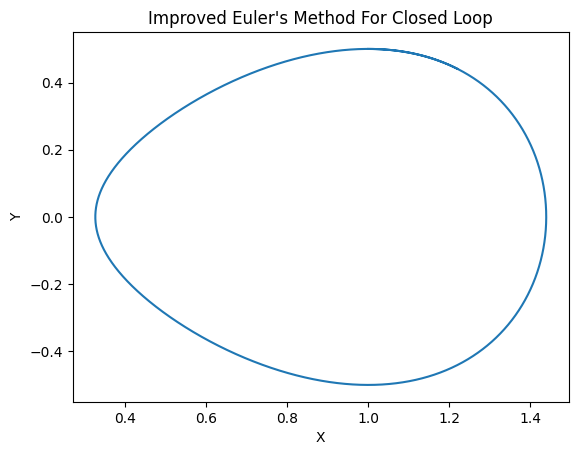

In [11]:
plotxy(x, y, "Improved Euler's Method For Closed Loop")

In [12]:
# parameters intializeation
h = 0.01  # Step size
t = np.arange(0, 2 * np.pi, h)
improved_euler_x = np.zeros(len(t))
improved_euler_y = np.zeros(len(t))
improved_euler_x[0] = 0.2
improved_euler_y[0] = 0.2


improved_euler_method(t, improved_euler_x, improved_euler_y, f2, g2, h)

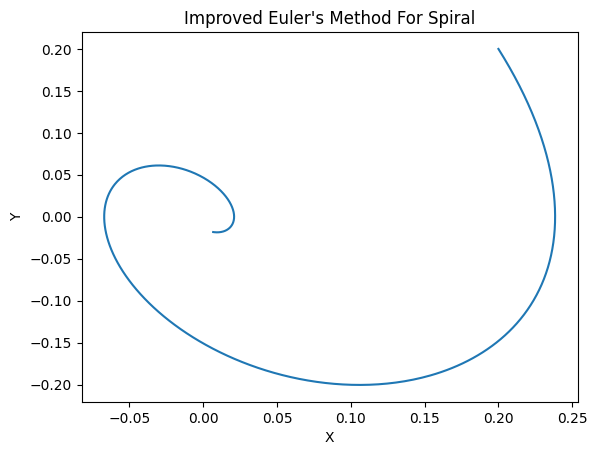

In [13]:
def plotxy(x, y, title):
    plt.plot(x, y)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.show()

plotxy(improved_euler_x, improved_euler_y, "Improved Euler's Method For Spiral")

## **Runge-Kutta method**

The Runge-Kutta method for the system mentioned above

$
\begin{aligned}
x_1(t + \Delta t) &= x_1(t) + \frac{\Delta t}{6} \cdot (k_{11} + 2k_{12} + 2k_{13} + k_{14}) \\
x_2(t + \Delta t) &= x_2(t) + \frac{\Delta t}{6} \cdot (k_{21} + 2k_{22} + 2k_{23} + k_{24})
\end{aligned}
$

$
\begin{aligned}
k_{11} &= f_1(x_1(t), x_2(t), t) \\
k_{12} &= f_1(x_1(t) + \frac{\Delta t}{2} \cdot k_{11}, x_2(t) + \frac{\Delta t}{2} \cdot k_{21}, t + \frac{\Delta t}{2}) \\
k_{13} &= f_1(x_1(t) + \frac{\Delta t}{2} \cdot k_{12}, x_2(t) + \frac{\Delta t}{2} \cdot k_{22}, t + \frac{\Delta t}{2}) \\
k_{14} &= f_1(x_1(t) + \Delta t \cdot k_{13}, x_2(t) + \Delta t \cdot k_{23}, t + \Delta t) \\
k_{21} &= f_2(x_1(t), x_2(t), t) \\
k_{22} &= f_2(x_1(t) + \frac{\Delta t}{2} \cdot k_{11}, x_2(t) + \frac{\Delta t}{2} \cdot k_{21}, t + \frac{\Delta t}{2}) \\
k_{23} &= f_2(x_1(t) + \frac{\Delta t}{2} \cdot k_{12}, x_2(t) + \frac{\Delta t}{2} \cdot k_{22}, t + \frac{\Delta t}{2}) \\
k_{24} &= f_2(x_1(t) + \Delta t \cdot k_{13}, x_2(t) + \Delta t \cdot k_{23}, t + \Delta t)
\end{aligned}
$


*Implement RK4 method for our system:*

In [14]:
def runge_kutta(t, x, y, f1, f2, h):
    for i in range(1, len(t)):
        k1 = h * f1(x[i-1], y[i-1], t[i-1])
        l1 = h * f2(x[i-1], y[i-1], t[i-1])

        k2 = h * f1(x[i-1] + k1/2, y[i-1] + l1/2, t[i-1] + h/2)
        l2 = h * f2(x[i-1] + k1/2, y[i-1] + l1/2, t[i-1] + h/2)

        k3 = h * f1(x[i-1] + k2/2, y[i-1] + l2/2, t[i-1] + h/2)
        l3 = h * f2(x[i-1] + k2/2, y[i-1] + l2/2, t[i-1] + h/2)

        k4 = h * f1(x[i-1] + k3, y[i-1] + l3, t[i-1] + h)
        l4 = h * f2(x[i-1] + k3, y[i-1] + l3, t[i-1] + h)

        x[i] = x[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
        y[i] = y[i-1] + (l1 + 2*l2 + 2*l3 + l4)/6

# parameters intializeation
h = 0.0001  # Step size
t = np.arange(0, 8, h)
x = np.zeros(len(t))
y = np.zeros(len(t))
x[0] = 1
y[0] = 0.5

runge_kutta(t, x, y, f1, g1, h)

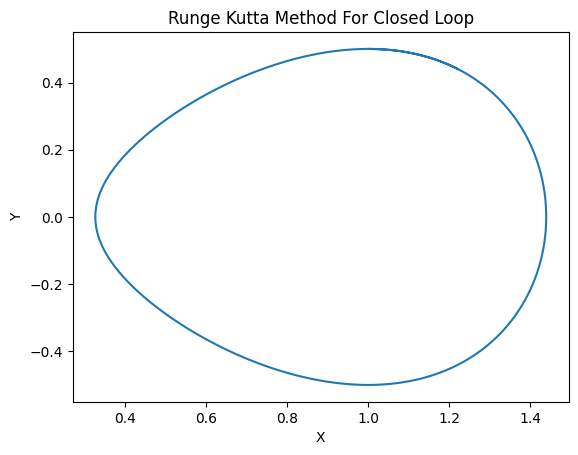

In [15]:
plotxy(x, y, "Runge Kutta Method For Closed Loop")

In [16]:
# parameters intializeation
h = 0.01  # Step size
t = np.arange(0, 2 * np.pi, h)
RK4x = np.zeros(len(t))
RK4y = np.zeros(len(t))
RK4x[0] = 0.2
RK4y[0] = 0.2


runge_kutta(t, RK4x, RK4y, f2, g2, h)

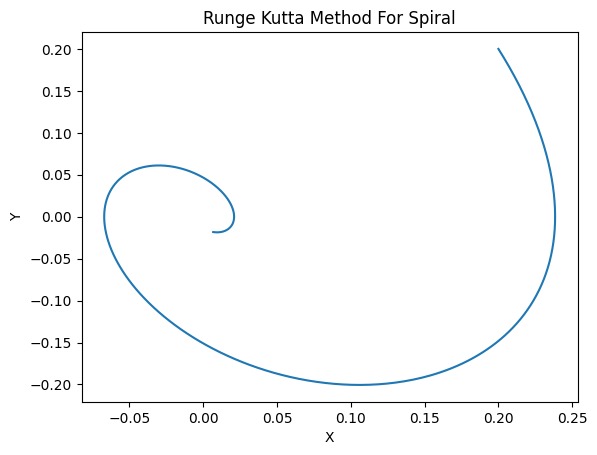

In [17]:
plotxy(RK4x, RK4y, "Runge Kutta Method For Spiral")

***
## **2. Neural Network solution**
***

Trial Solution:

$
u_1(t) = a_{01} + t \cdot N_1(t)
$

$
u_2(t) = a_{02} + t \cdot N_2(t)
$


Derivative of Trial Solution:

$
\frac{du_1}{dt} = t \cdot \frac{dN_1}{dt} + N_1(t)
$

$
\frac{du_2}{dt} = t \cdot \frac{dN_2}{dt} + N_2(t)
$


Loss Function:

$
L = \left(\frac{du_1}{dt} - F_1(u_1, u_2, t)\right)^2 + \left(\frac{du_2}{dt} - F_2(u_1, u_2, t)\right)^2
$


Defining the PINN:

In [400]:
from tensorflow import keras
from tensorflow.keras import layers

def build_neural_network(input_dim, hidden_units):
    model = keras.Sequential([
        layers.Dense(hidden_units, activation='tanh', input_shape=(input_dim,)),
        layers.Dense(hidden_units, activation='tanh', input_shape=(hidden_units,)),
        layers.Dense(1, input_shape=(hidden_units,))
    ])
    return model

NNx = build_neural_network(input_dim=1, hidden_units=32)

NNy = build_neural_network(input_dim=1, hidden_units=32)

In [401]:
# Let's define PINN's loss function:
# t - training set (tensor)
# NeuralNetwork - the neural network used in conjunction with ODE

def trial_solution(a0, neural_network, t):
    return tf.reshape(tf.constant(a0) + tf.multiply( tf.reshape(neural_network(t), [-1]) , tf.reshape(t, [-1])) , [-1])

def compute_trial_derivative(trial_solution, neural_network, t):
    with tf.GradientTape() as tape:
        tape.watch(t)
        trial = neural_network(t)
    nngrad = tf.reshape(tape.gradient(trial, t), [-1])
    #print(nngrad.shape)
    grad =  tf.reshape(t, [-1]) * nngrad + tf.reshape(neural_network(t), [-1])
    #print(grad.shape)
    return tf.reshape(grad, [-1])

# Let's define PINN's loss function:
# t - training set (tensor)
# NeuralNetwork - the neural network used in conjunction with ODE
def Loss(t, NetworkX, NetworkY):
    mse_loss = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)

    lossx = mse_loss(compute_trial_derivative(trial_solution, NetworkX, t),  trial_solution(0.2, NetworkY, t_train))
    lossy = mse_loss(compute_trial_derivative(trial_solution, NetworkY, t),  tf.pow(trial_solution(0.2, NetworkX, t_train), 2) - tf.constant(2.0) * trial_solution(0.2, NetworkX, t_train) -  trial_solution(0.2, NetworkY, t_train))
    return lossx + lossy

Organizing the learning process:

In [402]:
optm = tf.keras.optimizers.AdamW(learning_rate = 0.001)

In [404]:
N_epochs = 10000
print_epoch = 100

In [405]:
# train points
N_train = 400
t0 = 0
tn = 2 * np.pi

# train set of points t
t_train = tf.convert_to_tensor((np.linspace(t0, tn, N_train)).reshape(-1, 1), dtype=tf.float32)


trainable_varaibles = NNx.trainable_variables + NNy.trainable_variables
optm.build(trainable_varaibles)

# list of losses for plotting
train_loss_record = []

In [406]:
for epoch in range(N_epochs):
    with tf.GradientTape() as tape:
        # Watch the training tensor
        tape.watch(t_train)
        # Compute the loss
        current_loss = Loss(t_train, NNx, NNy)

    # Compute gradients for both networks
    gradients =  tape.gradient(current_loss, trainable_varaibles)
    optm.apply_gradients(zip(gradients, trainable_varaibles))




    # Record and print the loss
    train_loss_record.append(current_loss.numpy())
    if epoch % print_epoch == 0:
        print(f"Epoch {epoch}, Loss: {current_loss.numpy()}")

Epoch 0, Loss: 57.36732864379883
Epoch 100, Loss: 0.369087278842926
Epoch 200, Loss: 0.024510636925697327
Epoch 300, Loss: 0.017767533659934998
Epoch 400, Loss: 0.012765320017933846
Epoch 500, Loss: 0.008920762687921524
Epoch 600, Loss: 0.006104570813477039
Epoch 700, Loss: 0.004168621730059385
Epoch 800, Loss: 0.002914790529757738
Epoch 900, Loss: 0.0021416260860860348
Epoch 1000, Loss: 0.0016787733184173703
Epoch 1100, Loss: 0.0014007375575602055
Epoch 1200, Loss: 0.0012253037421032786
Epoch 1300, Loss: 0.001103779417462647
Epoch 1400, Loss: 0.0010098417988047004
Epoch 1500, Loss: 0.0009303507395088673
Epoch 1600, Loss: 0.0008592925732955337
Epoch 1700, Loss: 0.0007941282237879932
Epoch 1800, Loss: 0.000733901048079133
Epoch 1900, Loss: 0.0006782989948987961
Epoch 2000, Loss: 0.000627213972620666
Epoch 2100, Loss: 0.0005805722903460264
Epoch 2200, Loss: 0.0005382815725170076
Epoch 2300, Loss: 0.0005001830286346376
Epoch 2400, Loss: 0.00046606516116298735
Epoch 2500, Loss: 0.000435682

Plotting loss

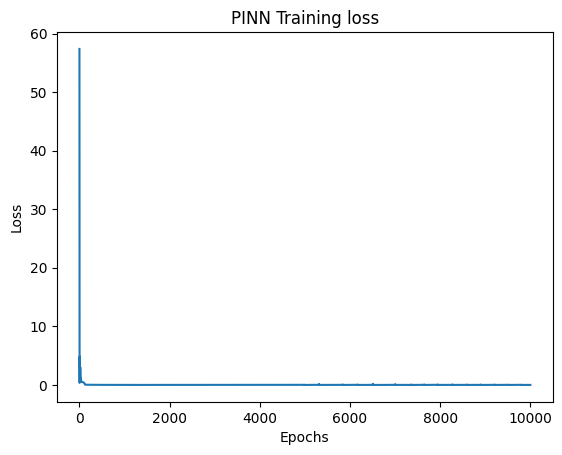

In [407]:
# plotting the loss
plt.plot(train_loss_record)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("PINN Training loss")
plt.show()

***
## **Solution**
***

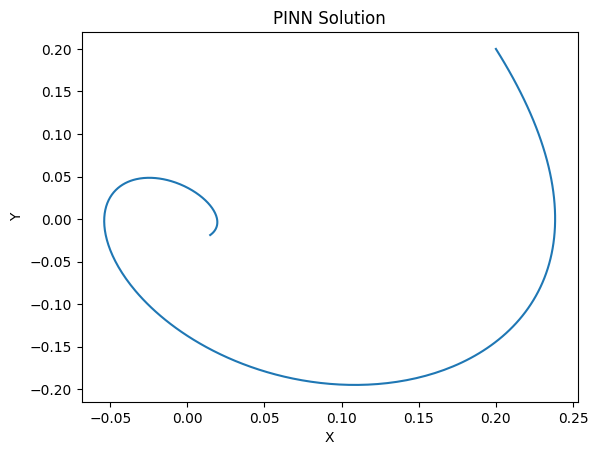

In [408]:
# Get the solution by PINN
PINN_x = trial_solution(0.2, NNx, t_train)
PINN_y = trial_solution(0.2, NNy, t_train)

plotxy(PINN_x, PINN_y, "PINN Solution")

Let's plot the graphs:

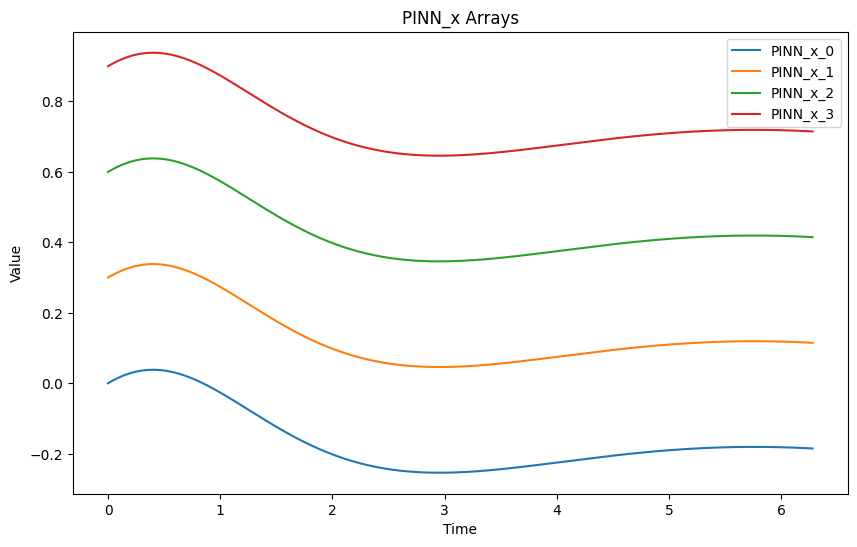

In [411]:
# plotting all the solutions x(t)
# solutions are shifted from the intial postion 0 by the Ai where Ai is initial position
PINN_x_0 = trial_solution(tf.constant(0.0), NNx, tf.convert_to_tensor(t, dtype=tf.float32))
PINN_x_arr = [PINN_x_0, PINN_x_0+ tf.constant(0.3), PINN_x_0 + tf.constant(0.6), PINN_x_0 + tf.constant(0.9)]
plt.figure(figsize=(10, 6))
for i, arr in enumerate(PINN_x_arr):
    plt.plot(t, arr, label=f'PINN_x_{i}')

plt.title('PINN_x Arrays')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

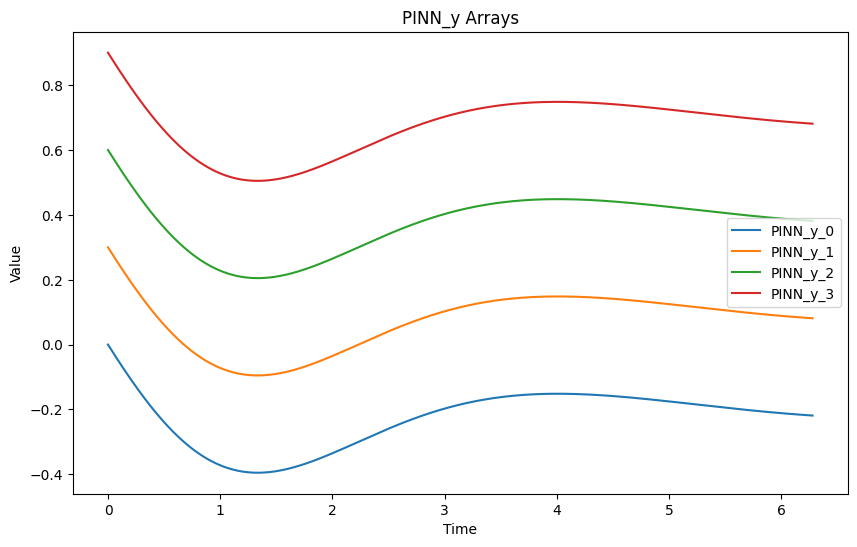

In [412]:
# plotting all the solutions y(t)
PINN_y_0 = trial_solution(tf.constant(0.0), NNy, tf.convert_to_tensor(t, dtype=tf.float32))
PINN_y_arr = [PINN_y_0, PINN_y_0+ tf.constant(0.3), PINN_y_0 + tf.constant(0.6), PINN_y_0 + tf.constant(0.9)]
plt.figure(figsize=(10, 6))
for i, arr in enumerate(PINN_y_arr):
    plt.plot(t, arr, label=f'PINN_y_{i}')

plt.title('PINN_y Arrays')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

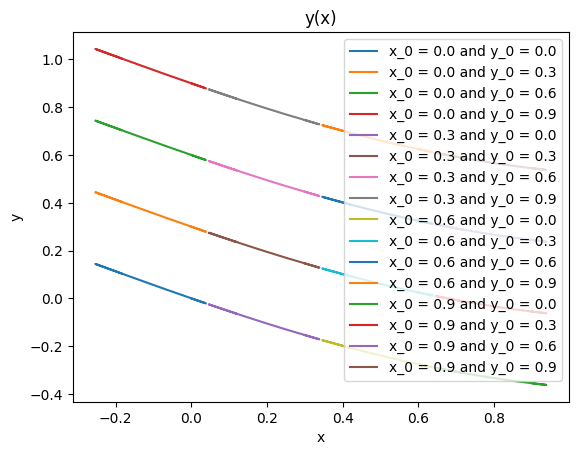

In [415]:
# plotting all the solutions y(x)
for x_0 in [0.0, 0.3, 0.6, 0.9]:
    PINN_x_0 = trial_solution(tf.constant(x_0), NNx, tf.convert_to_tensor(t, dtype=tf.float32))
    for y_0 in [0.0, 0.3, 0.6, 0.9]:
      PINN_y_x = trial_solution(tf.constant(y_0), NNy, tf.convert_to_tensor(PINN_x_0, dtype=tf.float32))
      plt.plot(PINN_x_0, PINN_y_x, label=f'x_0 = {x_0} and y_0 = {y_0}')

plt.title('y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

***
## **Estimating errors**
***

Let's evaluate the deviation from RK4 method:

In [416]:
PINN_x = trial_solution(0.2, NNx, tf.convert_to_tensor(t, dtype=tf.float32) )
local_dev_improved_euler = np.abs(np.array(RK4x) - np.array(improved_euler_x))
local_dev_euler = np.abs(np.array(RK4x) - np.array(euler_x))
local_dev_PINN = np.abs(np.array(RK4x) - np.array(PINN_x))



Now, let's evaluate the dependency of deviation on the grid size:



In [420]:
# global deviations for methods w.r.t. RK4
global_dev_x_improved_euler = np.max(local_dev_improved_euler)
global_dev_x_euler = np.max(local_dev_euler)
global_dev_x_PINN = np.max(local_dev_PINN)

print("Global Deviation in x (Improved Euler):", global_dev_x_improved_euler)
print("Global Deviation in x (Euler):", global_dev_x_euler)
print("Global Deviation in x (PINN):", global_dev_x_PINN)


Global Deviation in x (Improved Euler): 8.171191159922486e-06
Global Deviation in x (Euler): 0.0019581538122723785
Global Deviation in x (PINN): 0.014158739537510456


the graph of local deviations:

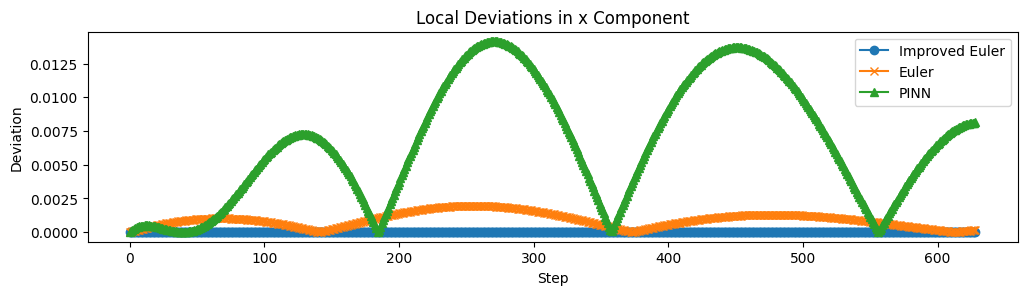

In [418]:
# plotting local deviations for Euler's method, improved Euler's method and PINN on the same graph
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)  # Two rows, one column, first plot
plt.plot(local_dev_improved_euler, label='Improved Euler', marker='o')
plt.plot(local_dev_euler, label='Euler', marker='x')
plt.plot(local_dev_PINN, label='PINN', marker='^')
plt.title('Local Deviations in x Component')
plt.xlabel('Step')
plt.ylabel('Deviation')
plt.legend()


the graph of global deviations:

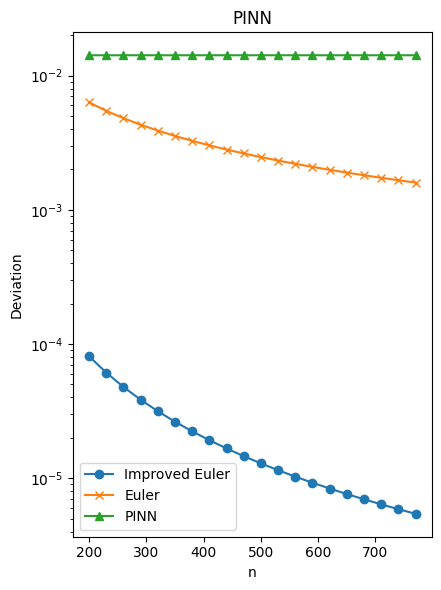

In [452]:
# plotting global deviations for Euler's method, improved Euler's method and PINN on the same graph for $n \in [n1, n2]$
n1 = 200
n2 = 800
dn = 30
global_dev_x_improved_euler = []
global_dev_x_euler = []
global_dev_x_PINN = []
n_arr = []
for n in range(n1, n2, dn):
  h = 2 * np.pi / n
  t = np.arange(0, 2 * np.pi, h)

  RK4x = np.zeros(len(t))
  RK4y = np.zeros(len(t))
  RK4x[0] = 0.2
  RK4y[0] = 0.2
  runge_kutta(t, RK4x, RK4y, f2, g2, h)

  euler_x = np.zeros(len(t))
  euler_y = np.zeros(len(t))
  euler_x[0] = 0.2
  euler_y[0] = 0.2
  euler_method(t, euler_x, euler_y, f2, g2, h)


  improved_euler_x = np.zeros(len(t))
  improved_euler_y = np.zeros(len(t))
  improved_euler_x[0] = 0.2
  improved_euler_y[0] = 0.2
  improved_euler_method(t, improved_euler_x, improved_euler_y, f2, g2, h)

  PINN_x = trial_solution(0.2, NNx, tf.convert_to_tensor(t, dtype=tf.float32) )

  local_dev_improved_euler = np.abs(np.array(RK4x) - np.array(improved_euler_x))
  local_dev_euler = np.abs(np.array(RK4x) - np.array(euler_x))
  local_dev_PINN = np.abs(np.array(RK4x) - np.array(PINN_x))

  global_dev_x_improved_euler.append(np.max(local_dev_improved_euler))
  global_dev_x_euler.append(np.max(local_dev_euler))
  global_dev_x_PINN.append(np.max(local_dev_PINN))
  n_arr.append(n)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)  # One row, three columns, first plot
plt.plot(n_arr, global_dev_x_improved_euler, label='Improved Euler', marker='o')
plt.yscale('log')
plt.title('Improved Euler')
plt.xlabel('n')
plt.ylabel('Deviation')
plt.legend()

plt.plot(n_arr, global_dev_x_euler, label='Euler', marker='x')
plt.yscale('log')
plt.title('Euler')
plt.xlabel('n')
plt.ylabel('Deviation')
plt.legend()

plt.plot(n_arr, global_dev_x_PINN, label='PINN', marker='^')
plt.yscale('log')
plt.title('PINN')
plt.xlabel('n')
plt.ylabel('Deviation')
plt.legend()

# Adjust spacing between subplots
plt.tight_layout()